In [8]:
from ISLP import load_data
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [4]:
Boston = load_data('Boston')

In [68]:
Boston.head()
coefs = []

In [69]:

def single_reg(pred):
    y = Boston['crim']
    x = Boston[pred]
    result = smf.ols('y~x',Boston).fit()
    coefs.append(result.params[0])
    print(pred, result.rsquared)
    print("P-value : " , result.pvalues)

In [70]:
cols = Boston.columns.drop('crim')
for col in cols: 
    single_reg(col)
# Every single variable is a good predictor except chas

zn 0.04018790803211114
P-value :  Intercept    4.037668e-24
x            5.506472e-06
dtype: float64
indus 0.16531007043075163
P-value :  Intercept    2.091266e-03
x            1.450349e-21
dtype: float64
chas 0.0031238689633061867
P-value :  Intercept    1.239505e-19
x            2.094345e-01
dtype: float64
nox 0.17721718179269363
P-value :  Intercept    5.076814e-15
x            3.751739e-23
dtype: float64
rm 0.048069116716083604
P-value :  Intercept    2.272000e-09
x            6.346703e-07
dtype: float64
age 0.12442145175894659
P-value :  Intercept    7.221718e-05
x            2.854869e-16
dtype: float64
dis 0.14414937492539892
P-value :  Intercept    1.502748e-33
x            8.519949e-19
dtype: float64
rad 0.39125668674998915
P-value :  Intercept    3.605846e-07
x            2.693844e-56
dtype: float64
tax 0.3396142433788122
P-value :  Intercept    2.773600e-23
x            2.357127e-47
dtype: float64
ptratio 0.08406843894373695
P-value :  Intercept    3.395255e-08
x            2

In [55]:
all_columns = "+".join([c for c in list(Boston.columns) if c not in ["crim"]])
model = 'crim ~' + all_columns
result = smf.ols(formula = model,data = Boston).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 22 May 2024   Prob (F-statistic):           2.03e-56
Time:                        12:42:55   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='x', ylabel='y'>

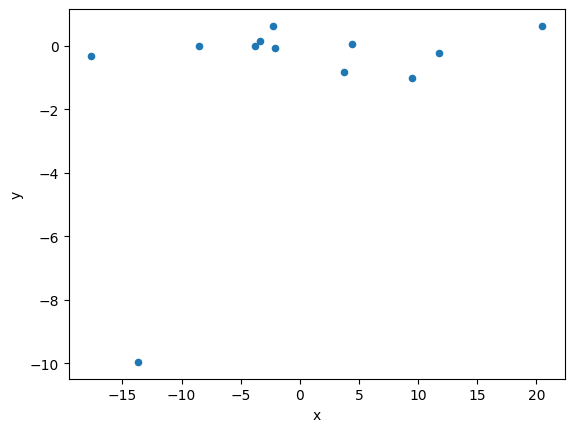

In [72]:
x = coefs
y = result.params[1:]
df = pd.DataFrame({'x':x, 'y':y})
df.plot.scatter('x','y')